# Iterative Dichotomiser 3

## Main idea

In ID3, we need to determine the order of the attributes to be considered at each step. For problems with many attributes and each attribute has many different values, finding the optimal solution is often not feasible. Instead, a simple method is often used: at each step, the best attribute will be selected based on some criteria (we will discuss soon). For each selected attribute, we divide the data into child nodes corresponding to the values ​​of that attribute and continue to apply this method to each child node. Choosing the best attribute at each step like this is called greedy selection. This selection may not be optimal, but intuition tells us that this method is close to the optimal solution. In addition, this method makes the problem to be solved simpler.

After each question, the data is divided into child nodes corresponding to the answers to that question. The question is an attribute, the answer is the value of that attribute. To evaluate the quality of a partition, we need to find a measure.

First, what is a good partition? Intuitively, a partition is best if the data in each child node belongs to one class only – then this child node can be considered a leaf node, meaning we do not need to divide it further. If the data in the child nodes are still mixed together in a large proportion, we consider that the partition is not really good. From this observation, we need a function to measure the purity, or impurity, of a partition. This function will give the lowest value if the data in each child node belongs to the same class (the purest), and give the highest value if each child node contains data from many different classes.

A function that has these characteristics and is widely used in information theory is the entropy function.

## Entropy function

Given a probability distribution of a discrete variable $x$ that can take on $n$ different values $x_1, x_2, \dots, x_n$. Suppose that the probability of $x_i$ is $p_i = p(x = x_i)$ with $0 \leq p_i \leq 1, \sum_{i=1}^n p_i = 1$. The denotation of this distribution is $\mathbf{p} = (p_1, p_2, \dots, p_n)$. The entropy of this distribution is defined as:

$$H(\mathbf{p}) = -\sum_{i=1}^n p_i \log(p_i) \tag{1}$$

where conventionally $0 \log(0) = 0$.

Consider a example with $n = 2$ given in *Figure 1*. In the case where $\mathbf{p}$ is purest, i.e. one of the two $p_i$ values ​​is $1$ and the other is $0$, the entropy of this distribution is $H(\mathbf{p}) = 0$. When $\mathbf{p}$ is the most opaque, that is, both $p_i$ values ​​= $0.5$, the entropy function reaches its highest value.

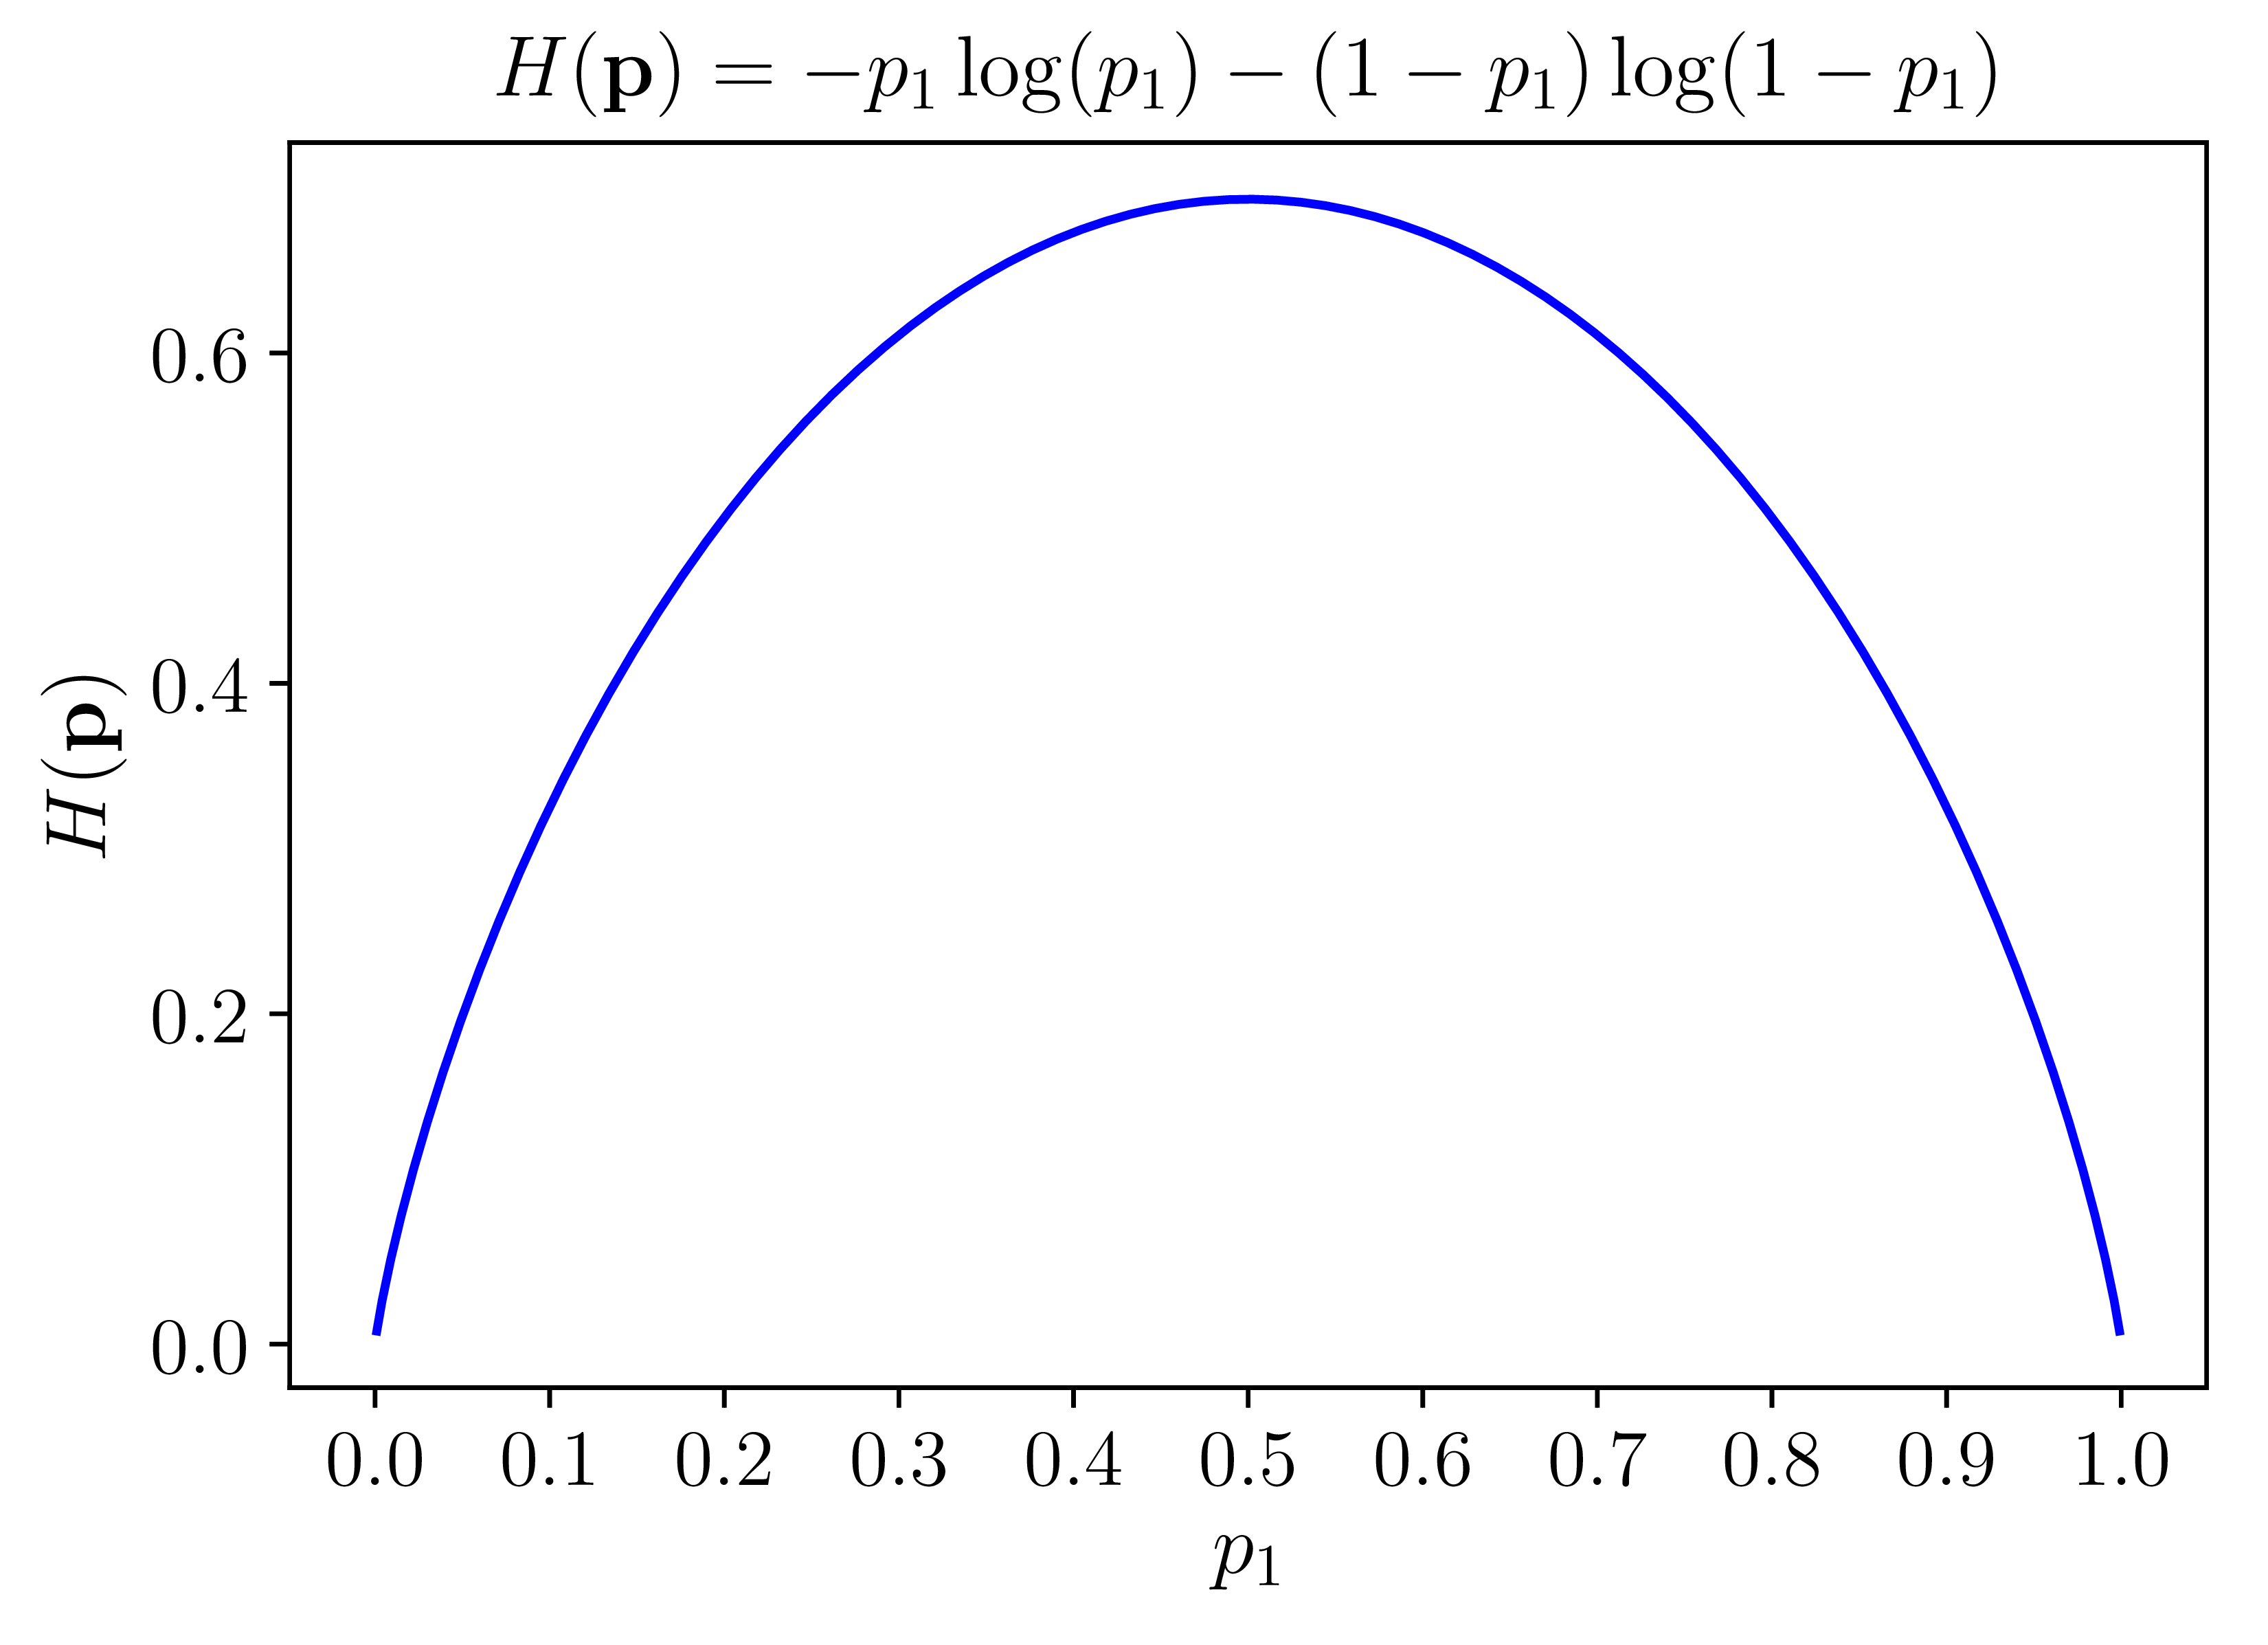

*Figure 1: The graph of entropy function with $n=2$*

Generalizing for $n>2$, the entropy function is minimum if there is a value of $p_i=1$, and maximum if all $p_i$ are equal (this can be proven by the Lagrange multiplier method).

These properties of the entropy function make it useful in measuring the turbidity of an ID3 partition. For this reason, ID3 is also called an entropy-based decision tree.

## ID3 algorithm

In ID3, the weighted sum of the entropy at the leaf-nodes after building the decision tree is considered the loss function of that decision tree. The weights here are proportional to the number of data points assigned to each node. The job of ID3 is to find reasonable ways to split (reasonable order of choosing attributes) so that the final loss function has the smallest value possible. As mentioned, this is achieved by choosing the attribute so that if that attribute is used for splitting, the entropy at each step is reduced by the largest amount. The problem of building a decision tree using ID3 can be divided into small problems, in each problem, we only need to choose the attribute that helps the split achieve the best result. Each of these small problems corresponds to the data split in a non-leaf node. We will build a calculation method based on each of these nodes.

Consider a problem with different $C$ classes. Suppose we are working with a non-leaf node whose data points form a set $\mathcal{S}$ with $|\mathcal{S}|=N$ elements. Suppose further that among these $N$ data points, $N_c, c=1,2,\ldots,C$ points belong to class $c$. The probability that each data point falls into a class $c$ is approximated by $\dfrac{N_c}{N}$ (maximum likelihood estimation). Thus, the entropy at this node is given by:

$$H(\mathcal{S}) = -\sum_{c=1}^C \frac{N_c}{N} \log\left(\frac{N_c}{N}\right) \tag{2}$$

Next, suppose the selected attribute is $x$. Based on $x$, the data points in $\mathcal{S}$ are divided into $K$ child nodes $\mathcal{S}_1,\mathcal{S}_2,\ldots,\mathcal{S}_K$ with the number of points in each child node being $m_1,m_2,\ldots,m_K$ respectively. We define:

$$H(x, \mathcal{S}) = \sum_{k=1}^K \frac{m_k}{N} H(\mathcal{S}_k)$$

is the weighted sum of the entroy of each child node – computed similarly to $(2)$. This weighting is important because nodes often have different numbers of points.

Next, we define the information gain based on the attribute $x$:

$$G(x, \mathcal{S}) = H(\mathcal{S}) - H(x, \mathcal{S})$$

In ID3, at each node, the selected attribute is determined based on:

$$x^* = \arg\max_{x} G(x, \mathcal{S}) = \arg\min_{x} H(x, \mathcal{S})$$

that is, the property that maximizes the information gain. The next question is when to stop splitting? The answer will be discussed after the [example](https://machinelearningcoban.com/2018/01/14/id3/).

## Stopping condition

In decision tree algorithms in general and ID3 in particular, if we continue to divide the impure nodes, we will get a tree in which every point in the training set is predicted correctly (assuming that no two identical inputs give different outputs). In this case, the tree can be very complex (many nodes) with many leaf nodes having only a few data points. Thus, there is a high possibility of overfitting.

To avoid overfitting, one of the following methods can be used. At a node, if one of the following conditions occurs, we do not continue to divide that node and consider it a leaf node:

- If that node has an entropy of 0, meaning that every point in the node belongs to one class.

- If that node has a number of elements less than a certain threshold. In this case, we accept that some points are misclassified to avoid overfitting. The class for this leaf node can be determined based on the majority class in the node.

- If the distance from that node to the root node reaches a certain value. Limiting the depth of this tree reduces the complexity of the tree and helps avoid overfitting.

- If the total number of leaf nodes exceeds a certain threshold.

- If dividing that node does not reduce the entropy too much (information gain is less than a certain threshold).

In addition to the above methods, another popular method used to avoid overfitting is pruning.

### Pruning

Pruning is a regularization technique to avoid overfitting a decision tree in general. In pruning, a decision tree is built until all points in the training set are correctly classified. Then, leaf nodes that share a non-leaf node are pruned and that non-leaf node becomes a leaf-node, with the class corresponding to the class that has the majority of all points assigned to that node. This decision tree pruning can be determined based on the following ways.

- **Based on a validation set:** First, the training set is split into a smaller training set and a validation set. The decision tree is built on the training set until all points in the training set are correctly classified. Then, going back from the leaf nodes, prune its sibling nodes and keep the parent node if the accuracy on the validation set improves. When the accuracy on the validation set does not improve any more, the pruning process stops. This method is also called reduced error pruning.

- **Based on the entire data set:** In this method, we do not separate the initial training set but use all the data in this set to build the decision tree. An example of this is to add a regularization term to the loss function. The regularization term will be large if the number of leaf nodes is large. Specifically, suppose the final decision tree has $K$ leaf nodes, the set of training points falling on each leaf node is $\mathcal{S}_1,\ldots,\mathcal{S}_K$ respectively. Then, the regularized loss of ID3 can be calculated similarly to $(5)$:

$$\mathcal{L} = \sum_{k = 1}^K \frac{|\mathcal{S}_k|}{|\mathcal{S}|} H(\mathcal{S}_k) + \lambda K \tag{5}$$

where $|\mathcal{S}_k|$ denotes the number of elements in the set $\mathcal{S}_k$ and $H(\mathcal{S}_k)$ is the entropy of the leaf node corresponding to $\mathcal{S}_k$, calculated similarly to $(2)$, and $\lambda$ is a positive real number that is not too large. 

The value of this function is small if both the data loss (the first term) is small (the entropy at each node is low) and the regularization (the second term) is also small (the number of leaf nodes is small). Since the loss function in $(5)$ is a discrete function, it is difficult to directly optimize this function. The optimization can be done through pruning as follows: 
1. Build a decision tree such that every point in the training set is correctly classified (all entopes of the nodes are $0$). At this point, the data loss is $0$ but the regularization can be large, making $\mathcal{L}$ large.
2. We can gradually prune the leaf nodes so that $\mathcal{L}$ decreases. The pruning is repeated until $\mathcal{L}$ cannot be reduced any further.

- Other pruning techniques can be found at https://link.springer.com/article/10.1023/A:1022604100933.


# Python programming for ID3

In [1]:
import numpy as np 
import pandas as pd 

class TreeNode(object):
    def __init__(self, ids = None, children = [], entropy = 0, depth = 0):
        self.ids = ids           # index of data in this node
        self.entropy = entropy   # entropy, will fill later
        self.depth = depth       # distance to root node
        self.split_attribute = None # which attribute is chosen, it non-leaf
        self.children = children # list of its child nodes
        self.order = None       # order of values of split_attribute in children
        self.label = None       # label of node if it is a leaf

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute # split at which attribute
        self.order = order # order of this node's children 

    def set_label(self, label):
        self.label = label # set label if the node is a leaf 

In [2]:
def entropy(freq):
    freq_0 = freq[np.array(freq).nonzero()[0]] # remove prob 0 
    prob_0 = freq_0/float(freq_0.sum())
    return -np.sum(prob_0*np.log(prob_0))

In [3]:
class DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 1e-4):
        self.root = None
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.Ntrain = 0
        self.min_gain = min_gain # minimum information gain
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0] # number of samples in training set
        self.data = data
        self.attributes = list(data) # list of attributes
        self.target = target 
        self.labels = target.unique()
        
        ids = range(self.Ntrain)
        self.root = TreeNode(ids = ids, entropy = self._entropy(ids))
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)
                if not node.children: # leaf node
                    self._set_label(node)
                queue += node.children
            else:
                self._set_label(node)
                
    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0
        ids = [i+1 for i in ids] # panda series index starts from 1
        freq = np.array(self.target[ids].value_counts()) # get frequency of each label
        return entropy(freq)

    def _set_label(self, node):
        # find label for a node if it is a leaf
        # simply chose by major voting 
        target_ids = [i + 1 for i in node.ids]  # target is a series variable
        node.set_label(self.target[target_ids].mode()[0]) # most frequent label
    
    def _split(self, node):
        ids = node.ids 
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique().tolist() # unique values of attribute
            # `values` is the possible values of attribute `att` in node `node`
            if len(values) == 1: continue # entropy = 0
            splits = []
            for val in values:
                sub_ids = sub_data.index[sub_data[att] == val].tolist() # index of each split
                splits.append([sub_id-1 for sub_id in sub_ids]) # need to minus 1 to get index of panda series
            # don't split if a node has too small number of points
            if min(map(len, splits)) < self.min_samples_split: continue
            # `map(len, splits)` is the number of points in each split

            # information gain
            HxS= 0
            for split in splits:
                HxS += len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS 
            if gain < self.min_gain: continue # stop if small gain 
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits
                best_attribute = att
                order = values
                
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids = split, entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]

        return child_nodes

    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.count()[0] # number of points
        labels = [None]*npoints # list of labels to be filled
        for n in range(npoints):
            x = new_data.iloc[n, :] # one point 
            # start from root and recursively travel if not meet a leaf 
            node = self.root
            while node.children:
                node = node.children[node.order.index(x[node.split_attribute])] # get the right child according to the value of split_attribute
            labels[n] = node.label
            
        return labels

In [4]:
df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)
df

/tmp/ipykernel_64316/1464835364.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)


,outlook,temperature,humidity,wind,play
id,,,,,
1,sunny,hot,high,weak,no
2,sunny,hot,high,strong,no
3,overcast,hot,high,weak,yes
4,rainy,mild,high,weak,yes
5,rainy,cool,normal,weak,yes
6,rainy,cool,normal,strong,no
7,overcast,cool,normal,strong,yes
8,sunny,mild,high,weak,no
9,sunny,cool,normal,weak,yes


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
tree = DecisionTreeID3(max_depth = 3, min_samples_split = 2)
tree.fit(X, y)
print(tree.predict(X))

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


/tmp/ipykernel_64316/145320759.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.Ntrain = data.count()[0] # number of samples in training set
/tmp/ipykernel_64316/145320759.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  npoints = new_data.count()[0] # number of points
